## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset 

In [2]:
df = pd.read_csv("train.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [3]:
cat_col=list(df.select_dtypes(include='object').columns)
temp=pd.DataFrame(columns=['Feature','cardinality'])
for i  in range(len(cat_col)):
    temp.loc[i,'Feature']=cat_col[i]
    temp.loc[i,'cardinality']=df[cat_col[i]].nunique()
temp.sort_values(by='cardinality',ascending=False).style.background_gradient(cmap='jet')

,Feature,cardinality
6,Loan Title,109
0,Batch Enrolled,41
2,Sub Grade,35
1,Grade,7
3,Employment Duration,3
4,Verification Status,3
7,Initial List Status,2
8,Application Type,2
5,Payment Plan,1


In [4]:
df_encode=df.drop(['Loan Title',"Accounts Delinquent",'Batch Enrolled','Sub Grade','Payment Plan','ID'],axis=1)

In [5]:
duplicate_rows = df_encode[df_encode.duplicated()]

if not duplicate_rows.empty:
    df_encode = df_encode.drop_duplicates()

In [6]:
constant_columns = [col for col in df_encode.columns if df_encode[col].nunique() == 1]

if constant_columns:
    df_encode = df_encode.drop(columns=constant_columns)

df_encode.shape, duplicate_rows.shape, constant_columns

((67463, 29), (0, 29), [])

## Descriptive Statistics & Data Visualization


Text(0.5, 1.0, 'Distribution of Loan Amount')

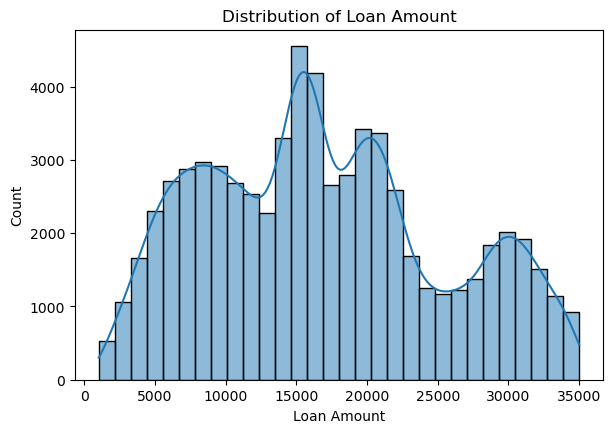

In [7]:
desc_stats = df_encode.describe()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_encode['Loan Amount'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')

Text(0.5, 1.0, 'Distribution of Interest Rate')

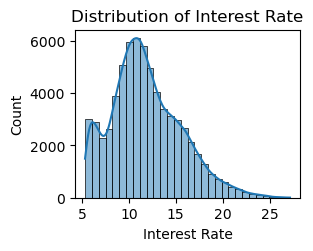

In [8]:
plt.subplot(2, 2, 2)
sns.histplot(df_encode['Interest Rate'], kde=True, bins=30)
plt.title('Distribution of Interest Rate')

Text(0.5, 1.0, 'Count of Loans by Grade')

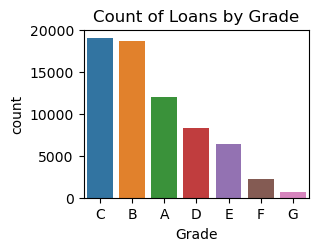

In [9]:
plt.subplot(2, 2, 3)
sns.countplot(data=df_encode, x='Grade', order=df_encode['Grade'].value_counts().index)
plt.title('Count of Loans by Grade')

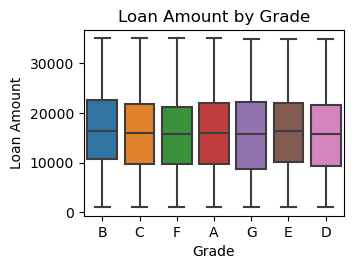

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,...,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,...,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,...,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,...,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,...,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,...,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,46.000000,2.283750e+05,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,...,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,16421.000000,1.177412e+06,201169.000000,1.000000


In [10]:
plt.subplot(2, 2, 4)
sns.boxplot(data=df_encode, x='Grade', y='Loan Amount')
plt.title('Loan Amount by Grade')

plt.tight_layout()
plt.show()

desc_stats

## Correlation Analysis

In [11]:
correlation_matrix = df_encode.select_dtypes(include=np.number).corr()

## Plotting Heatmap for Correlation Analysis

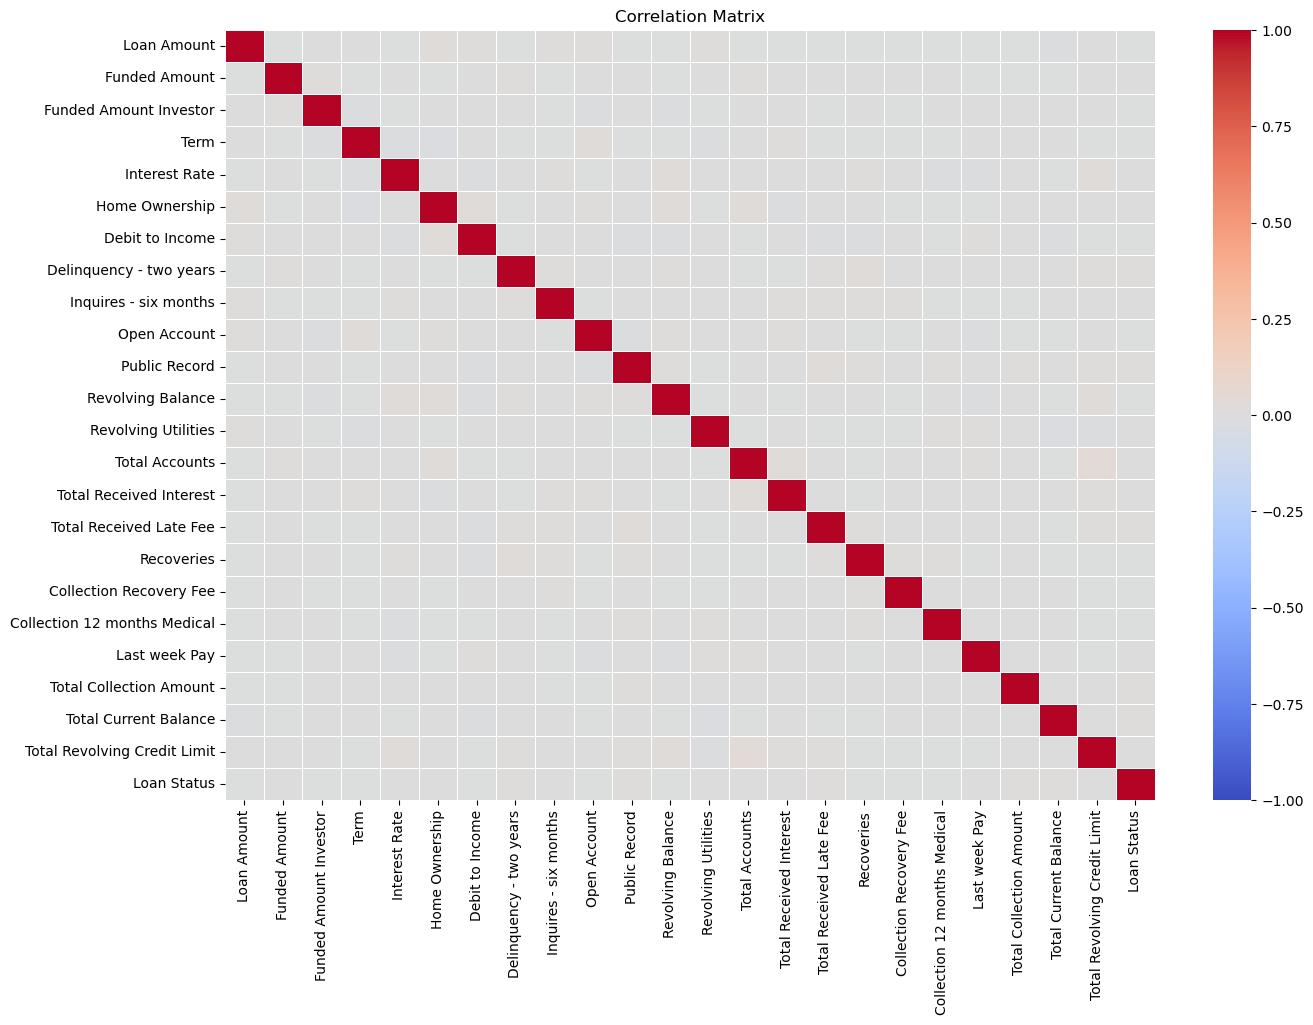

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=False, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Multivariate Analysis 

### Plotting Scatter Plot to Multivariate Analysis

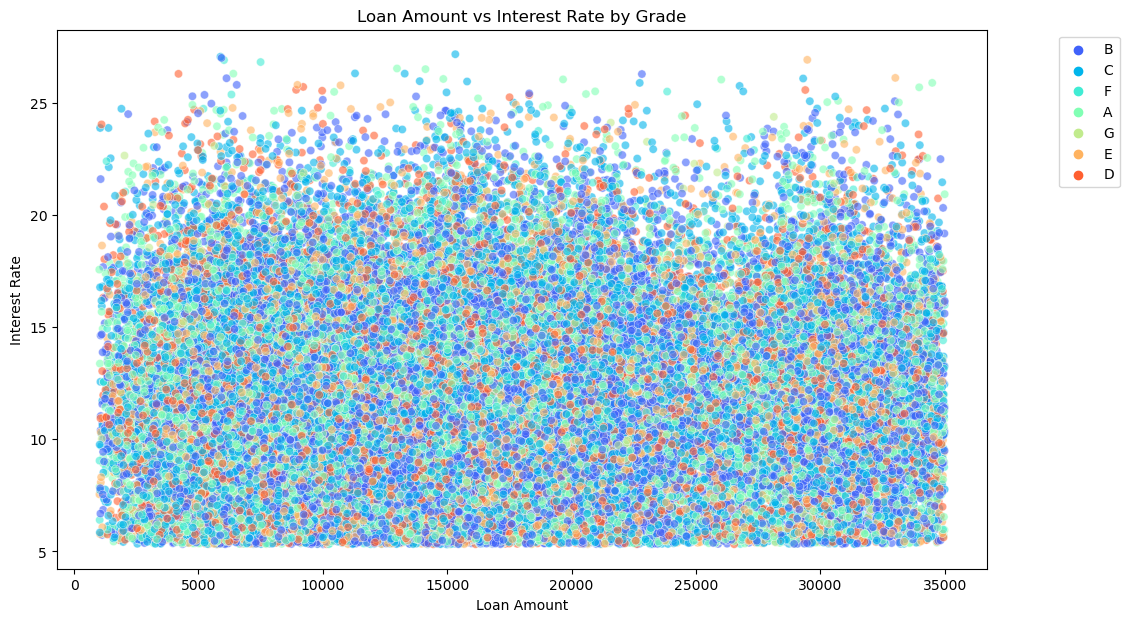

In [13]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_encode, x="Loan Amount", y="Interest Rate", hue="Grade", palette="rainbow", alpha=0.6)
plt.title('Loan Amount vs Interest Rate by Grade')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [14]:
data_types = df_encode.dtypes

object_columns = data_types[data_types == 'object'].index

unique_values_in_object_columns = {col: df_encode[col].unique() for col in object_columns}

unique_values_in_object_columns

{'Grade': array(['B', 'C', 'F', 'A', 'G', 'E', 'D'], dtype=object),
 'Employment Duration': array(['MORTGAGE', 'RENT', 'OWN'], dtype=object),
 'Verification Status': array(['Not Verified', 'Source Verified', 'Verified'], dtype=object),
 'Initial List Status': array(['w', 'f'], dtype=object),
 'Application Type': array(['INDIVIDUAL', 'JOINT'], dtype=object)}

In [15]:
df=pd.get_dummies(df_encode,columns=['Term', 'Grade', 'Employment Duration', 'Verification Status',
       'Initial List Status', 'Application Type'],drop_first=True)

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the ratio of negative to positive classes for XGBoost
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import cross_validate,RandomizedSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [18]:
X = df.drop(columns=['Loan Status'])
y = df['Loan Status']

In [19]:
smote=SMOTE()
smote.fit(X,y)
X,y=smote.fit_resample(X,y)

## Splitting the Dataset 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
models = {
    'Balanced Random Forest': BalancedRandomForestClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}

In [22]:
results = []

In [23]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results.append([name, accuracy, precision, recall, f1, roc_auc])

C:\Users\saiha\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\saiha\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [24]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])
print(results_df)

                      Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0    Balanced Random Forest  0.906897   0.941963  0.864157  0.901384  0.952941
1  Random Forest Classifier  0.908040   0.943951  0.864571  0.902519  0.953396
2                  AdaBoost  0.860100   0.858829  0.856693  0.857760  0.921708
3         Gradient Boosting  0.865981   0.880111  0.842594  0.860944  0.922146
4       Logistic Regression  0.510964   0.504073  0.420799  0.458687  0.522771


In [25]:
param_dist = {
    'n_estimators': [10, 50, 70],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    }

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=2, verbose=2, random_state=42,
                               n_jobs=-1)

rf_random.fit(X_train, y_train)


best_params = rf_random.best_params_
print("Best Parameters:", best_params)

C:\Users\saiha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best Parameters: {'n_estimators': 70, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [26]:
best_params={'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [27]:
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

## Confusion Matrix 

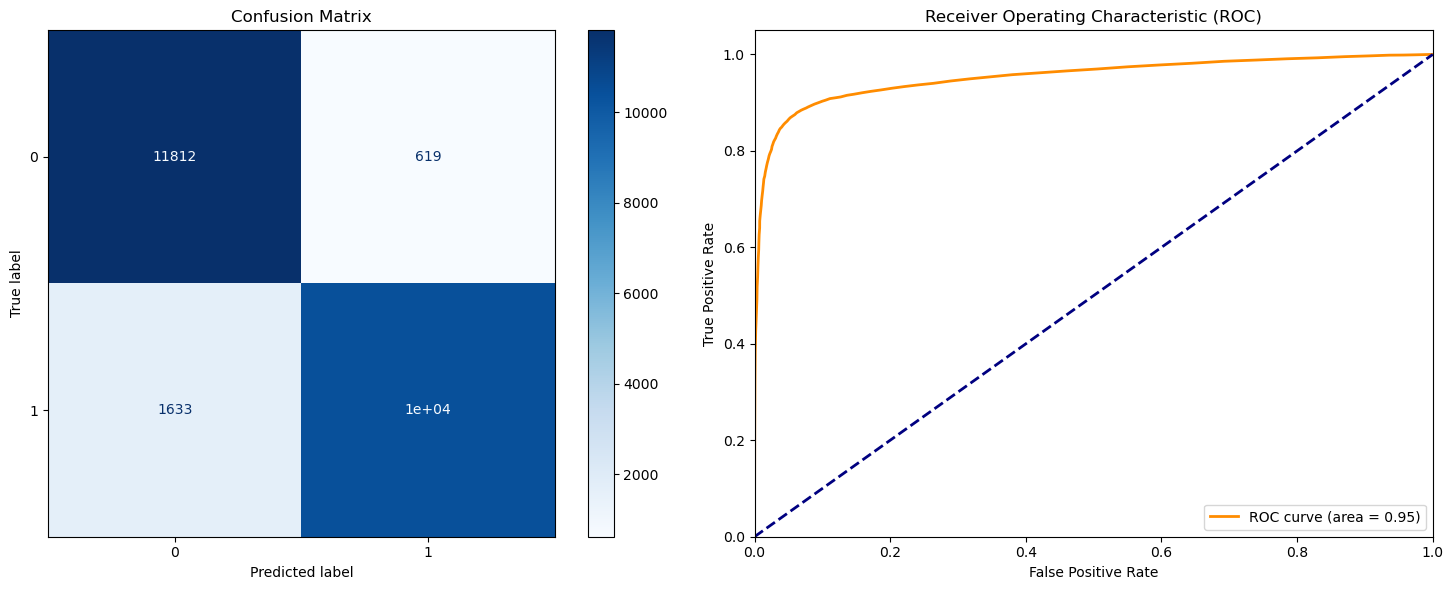

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, color='darkorange', lw=2, 
          label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate') 
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

## Accuracy 

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
    
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%") 
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")
print(f"ROC AUC: {roc_auc*100:.2f}%")

Accuracy: 90.80%
Precision: 94.40%
Recall: 86.46%
F1 Score: 90.25%
ROC AUC: 95.34%
